In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure 
%matplotlib inline
import nltk
import spacy
import re
import string
from collections import Counter
from nltk.corpus import stopwords 
from nltk import ngrams

!pip install Arabic-Stopwords
import arabicstopwords.arabicstopwords as stp

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [31]:
# Reading the file
df1 = pd.read_csv('./resourses/archive/stories_art-et-culture.csv', index_col='id', usecols=["id", "story", "topic"])
df2 = pd.read_csv('./resourses/archive/stories_economie.csv', index_col='id', usecols=["id", "story", "topic"])
df3 = pd.read_csv('./resourses/archive/stories_faits-divers.csv', index_col='id', usecols=["id", "story", "topic"])
df4 = pd.read_csv('./resourses/archive/stories_marocains-du-monde.csv', index_col='id', usecols=["id", "story", "topic"])
df5 = pd.read_csv('./resourses/archive/stories_medias.csv', index_col='id', usecols=["id", "story", "topic"])
df6 = pd.read_csv('./resourses/archive/stories_orbites.csv', index_col='id', usecols=["id", "story", "topic"])
df7 = pd.read_csv('./resourses/archive/stories_politique.csv', index_col='id', usecols=["id", "story", "topic"])
df8 = pd.read_csv('./resourses/archive/stories_regions.csv', index_col='id', usecols=["id", "story", "topic"])
df9 = pd.read_csv('./resourses/archive/stories_societe.csv', index_col='id', usecols=["id", "story", "topic"])
df10 = pd.read_csv('./resourses/archive/stories_sport.csv', index_col='id', usecols=["id", "story", "topic"])
df11 = pd.read_csv('./resourses/archive/stories_tamazight.csv', index_col='id', usecols=["id", "story", "topic"])

In [32]:
df1.head()

,story,topic
id,,
f06aa998054e11eba66e646e69d991ea,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
f1cf1b9c054e11ebb718646e69d991ea,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
f2d282a4054e11eb800f646e69d991ea,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
f3f46cac054e11eba403646e69d991ea,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture
f50f0476054e11eba31b646e69d991ea,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture


In [33]:
df7.head()

,story,topic
id,,
3a7f2f5e04dd11eba84c646e69d991ea,أكدت مصادر موثوقة لجريدة هسبريس الإلكترونية أن...,politique
3b2663cc04dd11ebb293646e69d991ea,شدد رئيس الحكومة، سعد الدين العثماني، على أن ا...,politique
3bc8521c04dd11ebb541646e69d991ea,يكاد يكون هناك إجماع على فشل الحكومة في تدبير ...,politique
3c5c092e04dd11eba4b7646e69d991ea,عقد الحبيب المالكي، رئيس مجلس النواب، اجتماعا ...,politique
3d126e6404dd11eba070646e69d991ea,تُواصل الرباط تنشيط جهازها الدبلوماسي بخصوص ال...,politique


In [34]:
# concatenate the 11 files
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11], axis=0, ignore_index=False)
df.index.name="id"

In [35]:
df.head()

,story,topic
id,,
f06aa998054e11eba66e646e69d991ea,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
f1cf1b9c054e11ebb718646e69d991ea,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
f2d282a4054e11eb800f646e69d991ea,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
f3f46cac054e11eba403646e69d991ea,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture
f50f0476054e11eba31b646e69d991ea,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture


In [36]:
df.tail()

,story,topic
id,,
75b0b940055811ebb2ff646e69d991ea,دافع ناشطون أمازيغ استقبلوا أخيرا وفدا من الطل...,tamazight
775c3440055811ebbc60646e69d991ea,خاضت الشاعرة الأمازيغية ملكية مزان اعتصاما لمد...,tamazight
78fea9ba055811eb9e32646e69d991ea,أدانت المنسقية الوطنية للمبادرة الطلابية ضد ال...,tamazight
7a58d38c055811ebb9c9646e69d991ea,طالبت الناشطة الأمازيغية مريم الدمناتي بضرورة ...,tamazight
7b769274055811eba13c646e69d991ea,اقتحم المئات من المتظاهرين المنحدرين من الأقلي...,tamazight


In [37]:
# df shape
df.shape

(11000, 2)

In [38]:
df.dtypes

story    object
topic    object
dtype: object

In [39]:
# df indecies
df.index

Index(['f06aa998054e11eba66e646e69d991ea', 'f1cf1b9c054e11ebb718646e69d991ea',
       'f2d282a4054e11eb800f646e69d991ea', 'f3f46cac054e11eba403646e69d991ea',
       'f50f0476054e11eba31b646e69d991ea', 'f65659e4054e11eb83ba646e69d991ea',
       'f7672d94054e11ebb2be646e69d991ea', 'f898201e054e11ebac29646e69d991ea',
       'f9de261e054e11eb927f646e69d991ea', 'fb360634054e11eb8cd5646e69d991ea',
       ...
       '6dcaabc2055811ebb6d4646e69d991ea', '6ef10468055811ebbb6d646e69d991ea',
       '71270ca2055811ebb026646e69d991ea', '727686de055811eb90bd646e69d991ea',
       '7402bae8055811eb8b17646e69d991ea', '75b0b940055811ebb2ff646e69d991ea',
       '775c3440055811ebbc60646e69d991ea', '78fea9ba055811eb9e32646e69d991ea',
       '7a58d38c055811ebb9c9646e69d991ea', '7b769274055811eba13c646e69d991ea'],
      dtype='object', name='id', length=11000)

In [40]:
# information about numerical columns
df.describe()

,story,topic
count,11000,11000
unique,10996,11
top,قرّرت المديرية الإقليمية لوزارة التربية الوطني...,art-et-culture
freq,2,1000


- there are 4 repeated stories 

In [41]:
# number of unique rows
df.story.nunique()

10996

In [42]:
# count of words
df.story.count()

11000

- there are not null values in the story column

In [43]:
# number of null values in each column
df.isna().sum()

story    0
topic    0
dtype: int64

In [44]:
# the dublicated values
df[df.duplicated()]

,story,topic
id,,
679c7ae204e911eb95c7646e69d991ea,جدّد عبد اللطيف الجواهري، والي بنك المغرب، الد...,economie
24822286055911eb89fe646e69d991ea,مع تفاقم الأوضاع الصّحية والاقتصادية والاجتماع...,orbites
3ac10d7e04df11eba941646e69d991ea,ترأس الملك محمد السادس، مساء اليوم، جلسة عمل خ...,politique
4ac3772c04e111ebb388646e69d991ea,قرّرت المديرية الإقليمية لوزارة التربية الوطني...,regions


In [45]:
# the dublicated values and it's original
df[df.duplicated(keep=False)]

,story,topic
id,,
6649843804e911ebb8a7646e69d991ea,جدّد عبد اللطيف الجواهري، والي بنك المغرب، الد...,economie
679c7ae204e911eb95c7646e69d991ea,جدّد عبد اللطيف الجواهري، والي بنك المغرب، الد...,economie
bc048112055811eba6d7646e69d991ea,مع تفاقم الأوضاع الصّحية والاقتصادية والاجتماع...,orbites
24822286055911eb89fe646e69d991ea,مع تفاقم الأوضاع الصّحية والاقتصادية والاجتماع...,orbites
39b18ad204df11eb9b46646e69d991ea,ترأس الملك محمد السادس، مساء اليوم، جلسة عمل خ...,politique
3ac10d7e04df11eba941646e69d991ea,ترأس الملك محمد السادس، مساء اليوم، جلسة عمل خ...,politique
498fdda604e111eb8a19646e69d991ea,قرّرت المديرية الإقليمية لوزارة التربية الوطني...,regions
4ac3772c04e111ebb388646e69d991ea,قرّرت المديرية الإقليمية لوزارة التربية الوطني...,regions


In [46]:
# in case you want to drop the dublicated rows, make inplace argument = True
df.drop_duplicates(subset='story', inplace=False)

,story,topic
id,,
f06aa998054e11eba66e646e69d991ea,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
f1cf1b9c054e11ebb718646e69d991ea,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
f2d282a4054e11eb800f646e69d991ea,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
f3f46cac054e11eba403646e69d991ea,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture
f50f0476054e11eba31b646e69d991ea,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture
...,...,...
75b0b940055811ebb2ff646e69d991ea,دافع ناشطون أمازيغ استقبلوا أخيرا وفدا من الطل...,tamazight
775c3440055811ebbc60646e69d991ea,خاضت الشاعرة الأمازيغية ملكية مزان اعتصاما لمد...,tamazight
78fea9ba055811eb9e32646e69d991ea,أدانت المنسقية الوطنية للمبادرة الطلابية ضد ال...,tamazight


In [47]:
# after deleting the 2 null words, number of rows reduced by 2
df.shape

(11000, 2)

In [48]:
# general info about columns of the data in our hand
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11000 entries, f06aa998054e11eba66e646e69d991ea to 7b769274055811eba13c646e69d991ea
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   story   11000 non-null  object
 1   topic   11000 non-null  object
dtypes: object(2)
memory usage: 257.8+ KB


## **1- number of examples per class**

In [49]:
df.topic.value_counts()

art-et-culture        1000
economie              1000
faits-divers          1000
marocains-du-monde    1000
medias                1000
orbites               1000
politique             1000
regions               1000
societe               1000
sport                 1000
tamazight             1000
Name: topic, dtype: int64

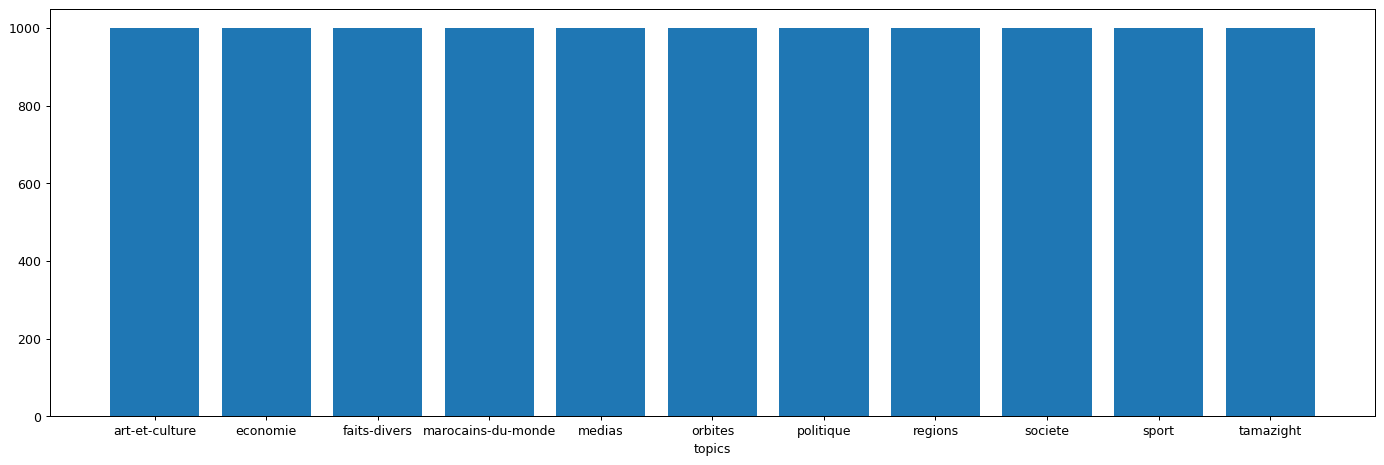

In [50]:
figure(figsize=(19, 6), dpi=90)
plt.bar(df.topic.value_counts().index, df.topic.value_counts())
plt.xlabel("topics")
plt.show()
# plt.xticks((df.decade.nunique()))

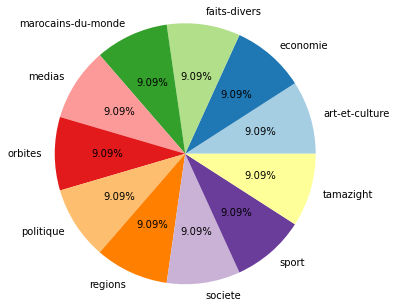

In [51]:
plt.pie(df["topic"].value_counts(), labels=df["topic"].value_counts().index, autopct='%1.2f%%', radius=1.5, colors=sns.color_palette('Paired'))
plt.show()

## - **number of samples per class equals 1000 for all classes**

#### **i would assume that you dont consider numbers, punctuations, tashkeel, and non arabic letters as a letter, so i would make some preprocessing to remove them if any of them are existed**

In [65]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                             """, re.VERBOSE)

def remove_diacritics(text):
    '''this function to remove diacritics'''
    
    text = re.sub(arabic_diacritics, '', text)
    return text

def normalize_arabic(text):
    '''this function to convert some special arabic characters into more general equivalent ones'''
    
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)   # i keep this because this one contains useful feature as specially iraq uses this character
    return text

def remove_punctuations(text):
    '''this function to remove punctuation'''
    
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

# def remove_repeating_char(text):
#     return re.sub(r'(.)\1+', r'\1', text)

def remove_stop_words(text):
    '''this function is to remove stop-words using nltk arabic-stopwords'''
    
    stop_words = list(stopwords.words('arabic'))
    return ' '.join(word for word in text.split() if word not in stop_words)

# alternative method to remove_stop_words
def remove_stop_words(text):
    '''this function is to remove stop-words'''
    
    return " ".join(word for word in text.split() if not stp.is_stop(word))

def clean_text(text):
    # t = re.sub(r'#', ' ', t) # replace '#' with space
    # t = re.sub(r'_', ' ', t)    # replace '_' with space
    text = re.sub(r'[^\u0600-\u06FF]', ' ', text) # remove all characters except arabic ones
    text = remove_diacritics(text) 
    text = remove_punctuations(text) # remove the remained punctuations, actually the remains are only """ ?,; """
    text = normalize_arabic(text)    # replace speacial arabic characters with some how general ones
    text = re.sub(r' +', ' ', text)  # remove multiple spaces, also can done with re.sub(r'/\s\s+/g', ' ', text)
    text = remove_stop_words(text)
    # text = remove_repeating_char(text)
    return text
    

In [66]:
# making preprocessing to remove unwanted symbols
df["preprocessed_story"] = [clean_text(text) for text in df["story"]]
df.head()

,story,topic,preprocessed_story
id,,,
f06aa998054e11eba66e646e69d991ea,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture,وجه بيت الشعر المغرب الي وزير الثقافه والشباب ...
f1cf1b9c054e11ebb718646e69d991ea,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture,استمرار حاله الطوارء الصحيه المرتبطه بجاءحه كو...
f2d282a4054e11eb800f646e69d991ea,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture,تشير مشاهده فيلم قصير الثلاثيه الاخيره للمخرج ...
f3f46cac054e11eba403646e69d991ea,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture,قلب ايام الحجر رات النور الفصول الاولي روايه م...
f50f0476054e11eba31b646e69d991ea,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture,اعلن الفنان المغربي سعيد مسكر تخليه مبلغ الدعم...


## **2a- top frequent n-grams generally**

In [87]:
# converting data frame into list of words in the same of it's order
words = ' , '.join(df.preprocessed_story).split()

In [77]:
# bigrams = zip(words, words[1:])
# trigrams = zip(words, words[1:], words[2:])
# counts2_ngrams = Counter(bigrams)
# counts3_ngrams = Counter(trigrams)

# Alternative method with almost the same output with help of nltk
counts2_ngrams = Counter(ngrams(words, 2))
counts3_ngrams = Counter(ngrams(words, 3))

In [84]:
counts2_ngrams.most_common(25)

[(('الي', 'ان'), 5705),
 (('فيروس', 'كورونا'), 2840),
 (('كورونا', 'المستجد'), 1950),
 (('مشيرا', 'الي'), 1657),
 (('الحجر', 'الصحي'), 1623),
 (('محمد', 'السادس'), 1604),
 (('الدار', 'البيضاء'), 1450),
 (('يمكن', 'ان'), 1437),
 (('الي', 'جانب'), 1321),
 (('النيابه', 'العامه'), 1286),
 (('جاءحه', 'كورونا'), 1260),
 (('بفيروس', 'كورونا'), 1233),
 (('رءيس', 'الحكومه'), 1230),
 (('الملك', 'محمد'), 1211),
 (('هسبريس', 'الالكترونيه'), 1208),
 (('يجب', 'ان'), 1170),
 (('لكره', 'القدم'), 1148),
 (('بالاضافه', 'الي'), 1126),
 (('ان', 'يكون'), 1078),
 (('اضافه', 'الي'), 1067),
 (('التواصل', 'الاجتماعي'), 1039),
 (('ان', 'المغرب'), 1000),
 (('لجريده', 'هسبريس'), 944),
 (('اللغه', 'الامازيغيه'), 939),
 (('وزاره', 'الصحه'), 909)]

AttributeError: 'list' object has no attribute 'plot'

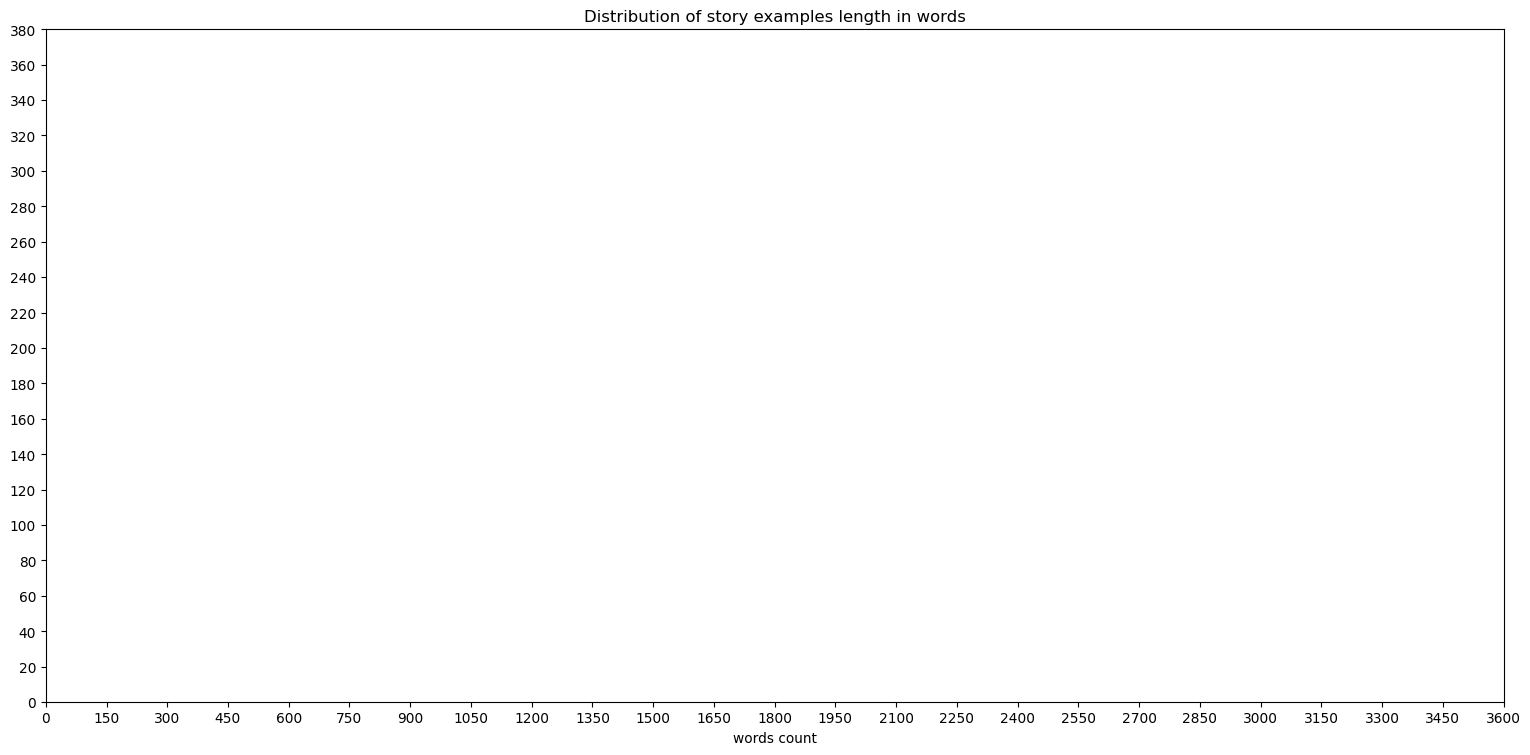

In [149]:
z = []
f = []
for i in counts3_ngrams.most_common(25):
    z+=[" ".join(i[0])]
    f+=[i[1]]
    
    

fig = plt.figure(figsize=(19, 9), dpi=99)
ax = fig.add_subplot(1, 1, 1)
# ax.set_facecolor((0.1, 0, 0, 0.03))
ax.set_xscale('linear');
ax.set_xlabel('words count')
ax.set_title('Distribution of story examples length in words')
ax.set_xticks(range(0, 3700, 150))
ax.set_yticks(range(0, 400, 20))
f.plot(kind='hist', bins=300, range=(0, 3700), histtype='barstacked');
ax.grid(ls='-.', which='both')
# ax.show()    
    
# plt.barh(y=range(len(z)), width=f)
# plt.xticks(ticks=range(len(z)), labels=z)
# plt.grid()

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer

# c_vec = CountVectorizer(ngram_range=(1, 3))

# count_values = dict()
# for topic in df.topic:
#     # input to fit_transform() should be an iterable with strings
#     ngrams = c_vec.fit_transform(df[df.topic==topic].preprocessed_story.tolist())

#     # needs to happen after fit_transform()
#     vocab = c_vec.vocabulary_

#     count_values[topic] = ngrams.toarray().sum(axis=0)

# # output n-grams
# # for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True):
# #     print(ng_count, ng_text)


##############################################################################################
# from sklearn.feature_extraction.text import CountVectorizer

# c_vec = CountVectorizer(ngram_range=(1, 3))

# # input to fit_transform() should be an iterable with strings
# ngrams = c_vec.fit_transform(df.preprocessed_story.tolist())

# # needs to happen after fit_transform()
# vocab = c_vec.vocabulary_

# count_values = ngrams.toarray().sum(axis=0)

# # output n-grams
# for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True):
#     print(ng_count, ng_text)

## **2b- top frequent n-grams per class**

In [110]:
# converting data frame into list of words in the same of it's order
topics_words = {topic:' , '.join(df[df.topic==topic].preprocessed_story).split() for topic in df.topic.unique()}

In [113]:
counts2_ngrams = {topic: Counter(ngrams(words, 2)) for topic in topics_words}
# counts3_ngrams = {topic: Counter(ngrams(words, 3)) for topic in topics_words}

MemoryError: 

In [84]:
counts2_ngrams.most_common(3)

[(('الي', 'ان'), 5705),
 (('فيروس', 'كورونا'), 2840),
 (('كورونا', 'المستجد'), 1950),
 (('مشيرا', 'الي'), 1657),
 (('الحجر', 'الصحي'), 1623),
 (('محمد', 'السادس'), 1604),
 (('الدار', 'البيضاء'), 1450),
 (('يمكن', 'ان'), 1437),
 (('الي', 'جانب'), 1321),
 (('النيابه', 'العامه'), 1286),
 (('جاءحه', 'كورونا'), 1260),
 (('بفيروس', 'كورونا'), 1233),
 (('رءيس', 'الحكومه'), 1230),
 (('الملك', 'محمد'), 1211),
 (('هسبريس', 'الالكترونيه'), 1208),
 (('يجب', 'ان'), 1170),
 (('لكره', 'القدم'), 1148),
 (('بالاضافه', 'الي'), 1126),
 (('ان', 'يكون'), 1078),
 (('اضافه', 'الي'), 1067),
 (('التواصل', 'الاجتماعي'), 1039),
 (('ان', 'المغرب'), 1000),
 (('لجريده', 'هسبريس'), 944),
 (('اللغه', 'الامازيغيه'), 939),
 (('وزاره', 'الصحه'), 909)]

In [85]:
counts3_ngrams.most_common(25)

[(('الملك', 'محمد', 'السادس'), 1181),
 (('مشيرا', 'الي', 'ان'), 1137),
 (('فيروس', 'كورونا', 'المستجد'), 1112),
 (('لجريده', 'هسبريس', 'الالكترونيه'), 827),
 (('تصريح', 'لجريده', 'هسبريس'), 680),
 (('بفيروس', 'كورونا', 'المستجد'), 652),
 (('هسبريس', 'الالكترونيه', 'ان'), 651),
 (('حاله', 'الطوارء', 'الصحيه'), 630),
 (('النيابه', 'العامه', 'المختصه'), 617),
 (('سعد', 'الدين', 'العثماني'), 596),
 (('الملكي', 'للثقافه', 'الامازيغيه'), 527),
 (('حزب', 'العداله', 'والتنميه'), 477),
 (('مشيره', 'الي', 'ان'), 462),
 (('الطابع', 'الرسمي', 'للامازيغيه'), 444),
 (('تصريح', 'لهسبريس', 'ان'), 431),
 (('وزاره', 'التربيه', 'الوطنيه'), 427),
 (('المعهد', 'الملكي', 'للثقافه'), 421),
 (('مواقع', 'التواصل', 'الاجتماعي'), 397),
 (('يشار', 'الي', 'ان'), 394),
 (('انتشار', 'فيروس', 'كورونا'), 377),
 (('جريده', 'هسبريس', 'الالكترونيه'), 372),
 (('تفشي', 'فيروس', 'كورونا'), 365),
 (('العامه', 'للامن', 'الوطني'), 347),
 (('الشءون', 'الخارجيه', 'والتعاون'), 332),
 (('جاءحه', 'فيروس', 'كورونا'), 315)]

## **3a- lengths of examples in words**

In [139]:
df["lengths_of_examples_words"] = [len(i) for i in df['preprocessed_story'].str.split()]

# # alternative code with the exact same result
# df["lengths_of_examples_words"] = df['preprocessed_story'].apply(lambda x: len(x.split()))
# df["lengths_of_examples_words"] = list(map(len, df['preprocessed_story'].str.split()))
# df["lengths_of_examples_words"] = df['preprocessed_story'].str.split().map(len)
#############################################
# # using nltk
# import nltk
# nltk.download('punkt')
# from nltk.tokenize import word_tokenize
# df["lengths_of_examples_words"] = [word_tokenize(line) for line in df.preprocessed_story]

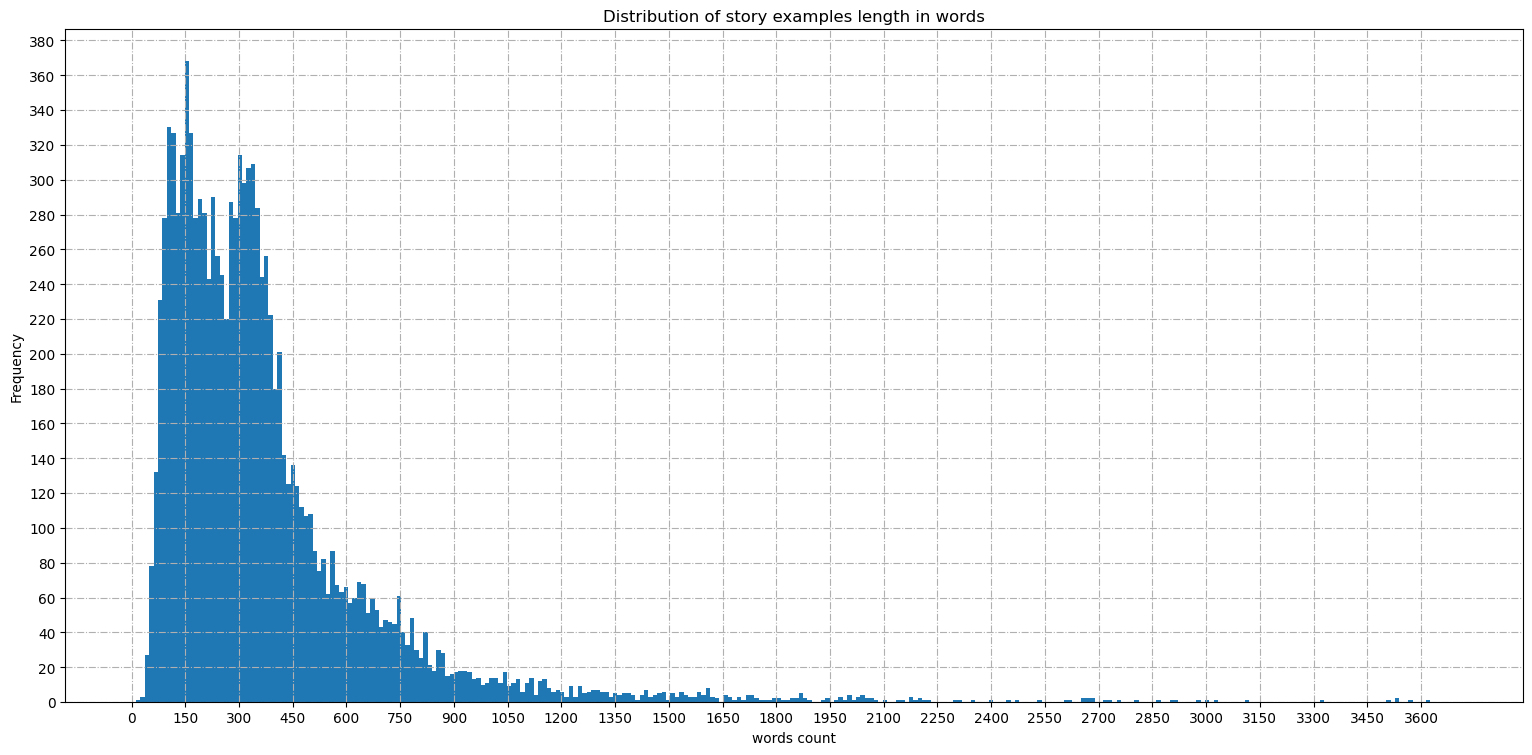

In [97]:
fig = plt.figure(figsize=(19, 9), dpi=99)
ax = fig.add_subplot(1, 1, 1)
# ax.set_facecolor((0.1, 0, 0, 0.03))
ax.set_xscale('linear');
ax.set_xlabel('words count')
ax.set_title('Distribution of story examples length in words')
ax.set_xticks(range(0, 3700, 150))
ax.set_yticks(range(0, 400, 20))
df["lengths_of_examples_words"].plot(kind='hist', bins=300, range=(0, 3700), histtype='barstacked');
ax.grid(ls='-.', which='both')
# ax.show()

In [170]:
# maximum lengths of examples in words
max(df["lengths_of_examples_words"])

5949

In [171]:
# minimum lengths of examples in words
min(df["lengths_of_examples_words"])

24

In [109]:
# sns.catplot(x="lengths_of_examples_words", kind="count", data=df, height=9, aspect=1.5)
# plt.xticks(rotation = 90)
# plt.show()

## **3b- lengths of examples in letters**

In [111]:
# in case you assume that the space is a letter
df["lengths_of_examples_letters"] = df.preprocessed_story.str.len()
# # alternative code with the exact same result
# df["lengths_of_examples_letters"] = [len(i) for i in df['preprocessed_story'].str]
# df["lengths_of_examples_letters"] = df['preprocessed_story'].apply(lambda x: len(x))
# df["lengths_of_examples_letters"] = list(map(len, df['preprocessed_story'].str))
# df["lengths_of_examples_letters"] = df['preprocessed_story'].str.map(len)

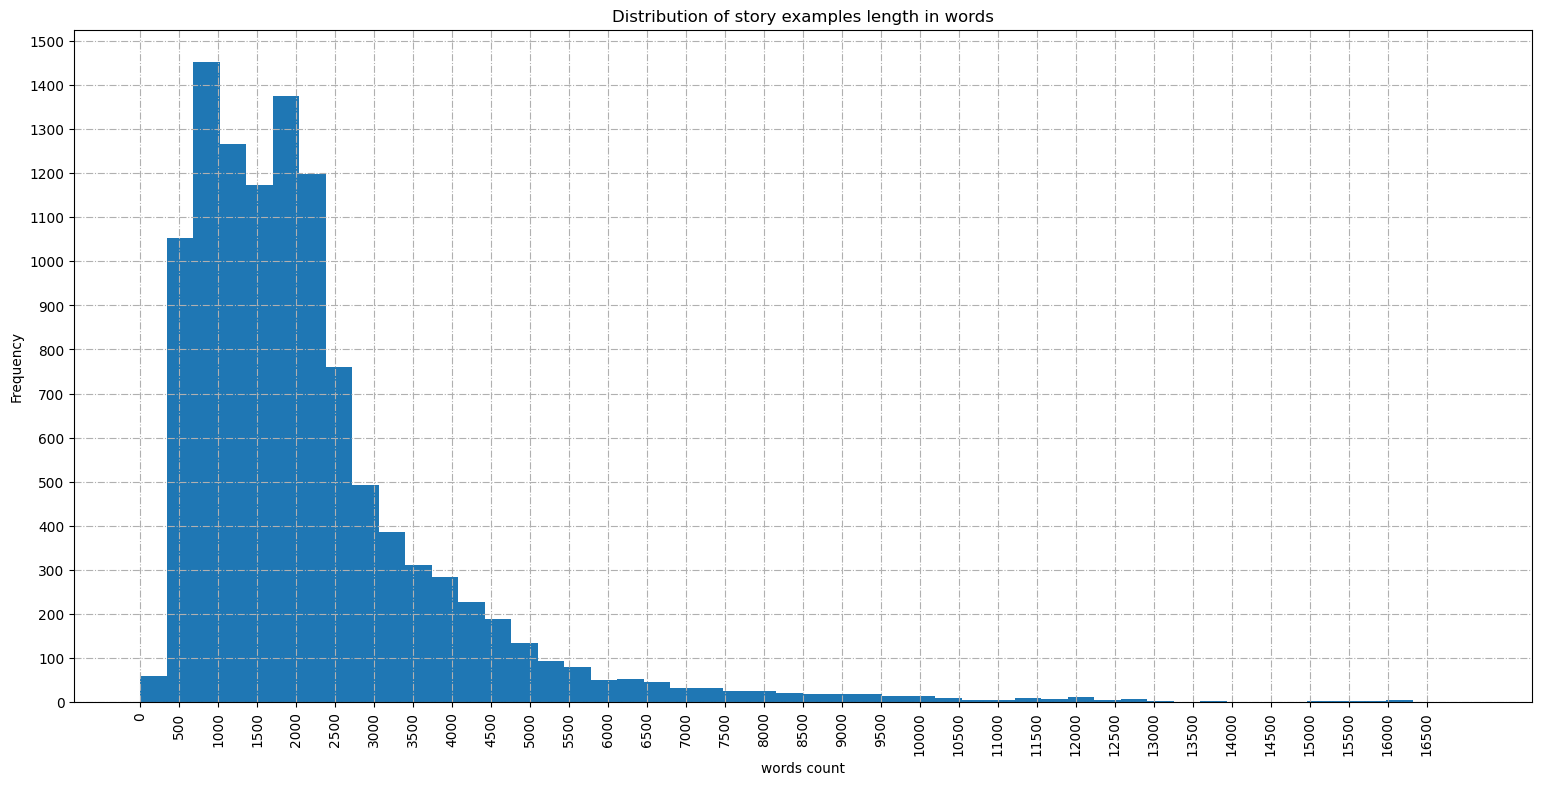

In [136]:
fig = plt.figure(figsize=(19, 9), dpi=99)
ax = fig.add_subplot(1, 1, 1)
# ax.set_facecolor((0.1, 0, 0, 0.03))
ax.set_xscale('linear');
ax.set_xlabel('words count')
ax.set_title('Distribution of story examples length in words')
ax.set_xticks(range(0, 17000, 500))
ax.set_yticks(range(0, 2700, 100))
df["lengths_of_examples_letters"].plot(kind='hist', bins=50, range=(0, 17000), histtype='barstacked');
plt.xticks(rotation = 90)
ax.grid(ls='-.', which='both')
# ax.show()

In [137]:
# maximum lengths of examples in words
max(df["lengths_of_examples_letters"])

32898

In [138]:
# minimum lengths of examples in words
min(df["lengths_of_examples_letters"])

131